# **Arrhythmia Analysis**
Arrhythmia merupakan penyakit detak jantung yang tidak tepat, apakah tidak teratur, terlalu cepat atau terlalu lambat. Aritmia jantung terjadi ketika impuls listrik di jantung tidak bekerja dengan baik. Sehingga, penyakit ini begitu berbahaya karena dapat menjadikan ancaman untuk nyawa penderitanya.

Sehingga, diperlukannya akurasi untuk mendeteksi keberadaan aritmia dan klasifikasi aritmia sangat penting. Perbedaan value parameter dapat di ekstrak dari waveform ECG dan dapat digunakan bersamaan dengan informasi pasiennya seperti umur, riwayat penyakit, dsb untuk mendeteksi adanya aritmia. Namun, terkadang sulit untuk dokter mengamati panjangnya durasi record dari ECG tersebut dan menemukan menit-menit irregularitas atau ketidakteraturan detak jantung. Sehingga, diperlukannya penggunaan machine learning untuk automasi diagnosis penyakit aritmia akan membantu para dokter.

**Bagian 01 - Data yang akan dipilih**


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn import metrics

import keras
import tensorflow as tf
import ssl
import math
import matplotlib.pyplot as plt
import operator

from collections import defaultdict
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, classification_report, f1_score,accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D,BatchNormalization,GlobalMaxPooling1D,MaxPooling1D
from keras.regularizers import l2,l1
from keras.utils import to_categorical
from keras.optimizers import RMSprop, SGD, Adam

In [100]:
data = pd.read_csv('arrhythmia.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [101]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [102]:
data.shape

(452, 280)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [104]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,452.0,46.471239,16.466631,0.0,36.00,47.00,58.000,83.0
1,452.0,0.550885,0.497955,0.0,0.00,1.00,1.000,1.0
2,452.0,166.188053,37.170340,105.0,160.00,164.00,170.000,780.0
3,452.0,68.170354,16.590803,6.0,59.00,68.00,79.000,176.0
4,452.0,88.920354,15.364394,55.0,80.00,86.00,94.000,188.0
...,...,...,...,...,...,...,...,...
275,452.0,0.514823,0.347531,-0.8,0.40,0.50,0.700,2.4
276,452.0,1.222345,1.426052,-6.0,0.50,1.35,2.100,6.0
277,452.0,19.326106,13.503922,-44.2,11.45,18.10,25.825,88.8
278,452.0,29.473230,18.493927,-38.6,17.55,27.90,41.125,115.9


In [105]:
#Split cell data dan atribut
df_data = data.iloc[:,:-1]
df_class = data.iloc[:,-1]

In [106]:
#Mengganti data yang missing/ data kosong menjadi NaN
count=0
for i in range(0,452):
    for j in range(0,280):
        if (data.iloc[i,j]=='?'):
            count =count+1
print(count)
df_data = df_data.replace('?', np.NaN)

408


Text(0, 0.5, 'Jumlah data NaN')

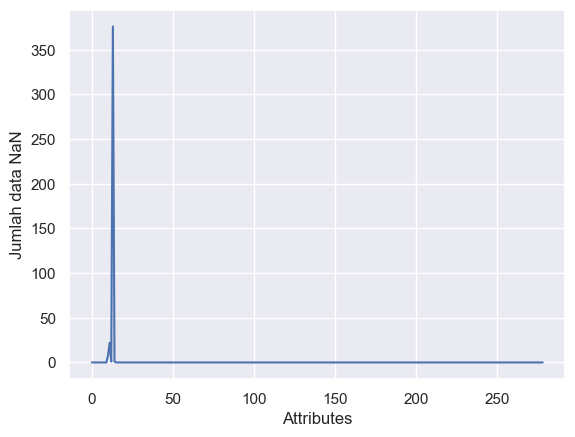

In [107]:
#Mengecek distribusi dari data yang missing / data kosong
pd.isnull(df_data).sum().plot()
plt.xlabel('Attributes')
plt.ylabel('Jumlah data NaN')

Text(0, 0.5, 'Jumlah data NaN')

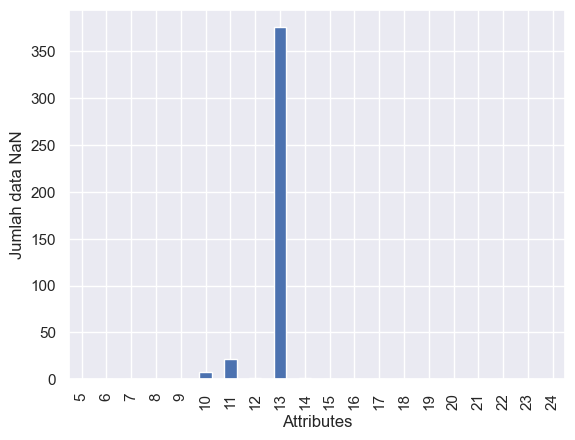

In [108]:
#Memperbesar grafik dari data kosong
pd.isnull(df_data).sum()[5:25].plot(kind = 'bar')
plt.xlabel('Attributes')
plt.ylabel('Jumlah data NaN')

In [109]:
#Menghilangkan attribute 13 karena memiliki terlalu banyak data kosong
df_data.drop(columns=13, inplace=True)

In [110]:
#Menghilangkan atribut yang memiliki lebih 40% data kosong
thresh = len(df_data) * 0.4
df_data.dropna(thresh = thresh, axis = 1, inplace=True)

In [111]:
#Mereplace data kosong
#imputing sisa data kosong menggunaakn median dari nilai pada kolom
imp_mean = SimpleImputer(missing_values=np.NaN, strategy='median')
imputer = imp_mean.fit(df_data)
df_imp = imputer.transform(df_data)
df_data = pd.DataFrame(df_imp)


In [112]:
#Scaling Attribute
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(df_data.values) 
df_data = pd.DataFrame(x_scaled, index = df_data.index)


In [113]:
print(df_data.shape)

(452, 278)


**Data Splitting into Train,Test, and Validation**

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(df_data, df_class, test_size=0.3, shuffle = True, stratify = df_class, random_state=43)

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(316, 278) (316,) (136, 278) (136,)


**Menentukan Weight Kelas untuk dataset yang tidak stabil**

In [115]:
from sklearn.utils import class_weight
class_wt = class_weight.compute_class_weight(
    class_weight= 'balanced', 
    classes = np.unique(Y_train), 
    y = Y_train)
class_weights = dict(zip([1,2,3,4,5,6,7,8,9,10,14,15,16], class_wt))
#class_weights[0] = 0
#class_weights[11] = 0
#class_weights[12] = 0
#class_weights[13] = 0
print(class_wt.sum())
print(class_weights)

print(np.bincount(Y_train))
print(np.bincount(Y_test))

66.48389473526794
{1: 0.14215024741340532, 2: 0.7841191066997518, 3: 2.2097902097902096, 4: 2.2097902097902096, 5: 2.700854700854701, 6: 1.4298642533936652, 7: 12.153846153846153, 8: 24.307692307692307, 9: 4.051282051282051, 10: 0.6945054945054945, 14: 8.102564102564102, 15: 6.076923076923077, 16: 1.6205128205128205}
[  0 171  31  11  11   9  17   2   1   6  35   0   0   0   3   4  15]
[ 0 74 13  4  4  4  8  1  1  3 15  0  0  0  1  1  7]


**Pemilihan Feature - Train Dataset**

**Principle Component Analysis (PCA)**

Pencarian grid pada berbagai jumlah komponen PCA yang akan dipertahankan.

Menentukan jumlah komponen yang akan dipilih berdasarkan plot dari:

Plot nilai Eigen v/s Jumlah komponen.
Plot Persentase varians kumulatif v/s Jumlah komponen.
Berdasarkan plot pilih semua komponen dengan nilai eigen lebih besar atau sama dengan 1 (Rule of Thumb).

Components from Feature selection using PCA (Having Eigen values >=1)- 88

Feature Selection using PCA complete for the train data.




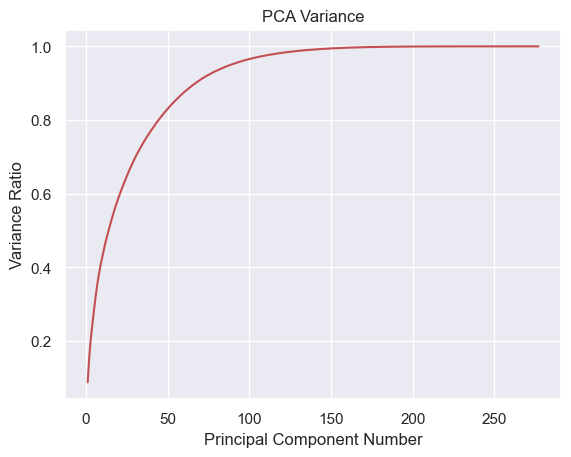

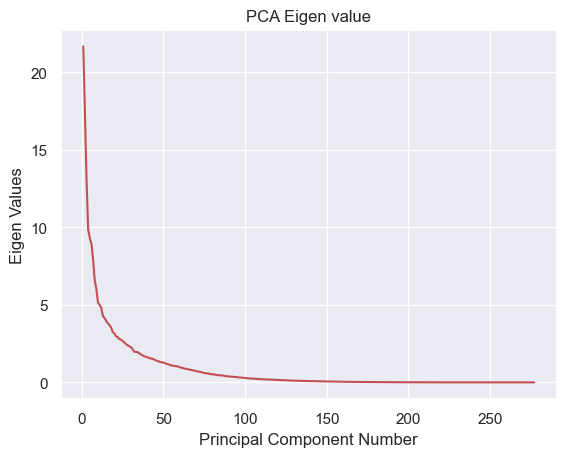

In [116]:
# Implementation of PCA
pca_dict = {}
eigen_dict = {}
for n_comp in df_data.columns:
    pca = PCA(n_components=n_comp)
    temp_train_pca = pca.fit_transform(X_train)
    temp_test_pca = pca.transform(X_test)
    eigen_values = pca.explained_variance_[:n_comp]
    
    if n_comp > 0:
        #print (n_comp,pca.explained_variance_ratio_.sum(),eigen_values)[-1])
        pca_dict[n_comp] = pca.explained_variance_ratio_.sum()
        eigen_dict[n_comp] = eigen_values[-1]

f = plt.figure(1)
f.patch.set_facecolor('white')
plt.title('PCA Variance')
plt.xlabel('Principal Component Number')
plt.ylabel('Variance Ratio')
plt.plot(list(pca_dict.keys()),list(pca_dict.values()),'r')
f.show()

g = plt.figure(2)
g.patch.set_facecolor('white')
plt.title('PCA Eigen value')
plt.xlabel('Principal Component Number')
plt.ylabel('Eigen Values')
plt.plot(list(eigen_dict.keys()),list(eigen_dict.values()),'r')
g.show()

# Selecting components with Eigen value greater than 1 from the list
#pca_comp_eigen = max([key for key,val in eigen_dict.items() if val >= 1])
pca_comp_eigen = max([key for key,val in pca_dict.items() if val < 0.95])

print('Components from Feature selection using PCA (Having Eigen values >=1)- ' + str(pca_comp_eigen) + '\n')

# Performing PCA for the train data with the fixed components
pca = PCA(n_components=pca_comp_eigen)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print('Feature Selection using PCA complete for the train data.\n\n')

**1D CNN CLASSIFICATION**

In [119]:
# Split the data into train and validation
X_train_cnn, X_val_cnn, Y_train_cnn, Y_val_cnn = train_test_split(X_train, Y_train, test_size=0.2,  random_state=0)

Xtrain = np.expand_dims(X_train, 2)
Ytrain = to_categorical(Y_train)
Xval = np.expand_dims(X_test, 2)
Yval = to_categorical(Y_test)
print(Xtrain.shape,Ytrain.shape,Xval.shape,Yval.shape)

print(np.bincount(Y_train))
print(np.bincount(Y_test))
print(np.bincount(Y_train_cnn))
print(np.bincount(Y_val_cnn))

(316, 278, 1) (316, 17) (136, 278, 1) (136, 17)
[  0 171  31  11  11   9  17   2   1   6  35   0   0   0   3   4  15]
[ 0 74 13  4  4  4  8  1  1  3 15  0  0  0  1  1  7]
[  0 130  25   9   9   7  13   2   1   6  31   0   0   0   2   4  13]
[ 0 41  6  2  2  2  4  0  0  0  4  0  0  0  1  0  2]


**Menentukan Class Weight untuk dataset yang tidak stabil**

In [121]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    class_weight= 'balanced', 
    classes = np.unique(Y_train), 
    y = Y_train)
class_weights_dict = dict(zip([1,2,3,4,5,6,7,8,9,10,14,15,16], class_weights))
class_weights_dict[0] = 0
class_weights_dict[11] = 0
class_weights_dict[12] = 0
class_weights_dict[13] = 0
print(class_weights.sum())
print(class_weights_dict)

66.48389473526794
{1: 0.14215024741340532, 2: 0.7841191066997518, 3: 2.2097902097902096, 4: 2.2097902097902096, 5: 2.700854700854701, 6: 1.4298642533936652, 7: 12.153846153846153, 8: 24.307692307692307, 9: 4.051282051282051, 10: 0.6945054945054945, 14: 8.102564102564102, 15: 6.076923076923077, 16: 1.6205128205128205, 0: 0, 11: 0, 12: 0, 13: 0}


**Membuat Model Weighted 1D CNN**

In [122]:
#model
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=10,activation='relu',kernel_initializer='he_uniform', input_shape=(278,1)))
model.add(Conv1D(filters=128, kernel_size=10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(17, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 269, 64)           704       
                                                                 
 conv1d_7 (Conv1D)           (None, 260, 128)          82048     
                                                                 
 dropout_3 (Dropout)         (None, 260, 128)          0         
                                                                 
 flatten_3 (Flatten)         (None, 33280)             0         
                                                                 
 dense_34 (Dense)            (None, 128)               4259968   
                                                                 
 dense_35 (Dense)            (None, 64)                8256      
                                                                 
 dense_36 (Dense)            (None, 17)               

**Train Model dan save validation accuracy checkpoint yang terbaik**

In [123]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
batch_size= 16
no_epochs = 20

earlystop = EarlyStopping(monitor='val_accuracy', patience=20)
checkpoint = ModelCheckpoint('model-epoch-{epoch:03d}-valacc-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')

# Generate the fit model
hist = model.fit(Xtrain, Ytrain, 
                epochs=no_epochs, 
                batch_size=batch_size, 
                validation_data=(Xval, Yval),
                callbacks=[earlystop, checkpoint],
                class_weight = class_weights_dict)

Epoch 1/20
19/20 [===========================>..] - ETA: 0s - loss: 3.8022 - accuracy: 0.1349
Epoch 1: val_accuracy improved from -inf to 0.19118, saving model to model-epoch-001-valacc-0.191176.h5
20/20 [==============================] - 2s 65ms/step - loss: 3.7393 - accuracy: 0.1392 - val_loss: 2.7711 - val_accuracy: 0.1912
Epoch 2/20
19/20 [===========================>..] - ETA: 0s - loss: 1.5720 - accuracy: 0.2533
Epoch 2: val_accuracy improved from 0.19118 to 0.34559, saving model to model-epoch-002-valacc-0.345588.h5
20/20 [==============================] - 1s 55ms/step - loss: 1.5541 - accuracy: 0.2627 - val_loss: 2.0626 - val_accuracy: 0.3456
Epoch 3/20
20/20 [==============================] - ETA: 0s - loss: 0.5763 - accuracy: 0.6171
Epoch 3: val_accuracy did not improve from 0.34559
20/20 [==============================] - 1s 52ms/step - loss: 0.5763 - accuracy: 0.6171 - val_loss: 2.5922 - val_accuracy: 0.3456
Epoch 4/20
20/20 [==============================] - ETA: 0s - loss

**Visualisasi Training dan Akurasi Validasi**

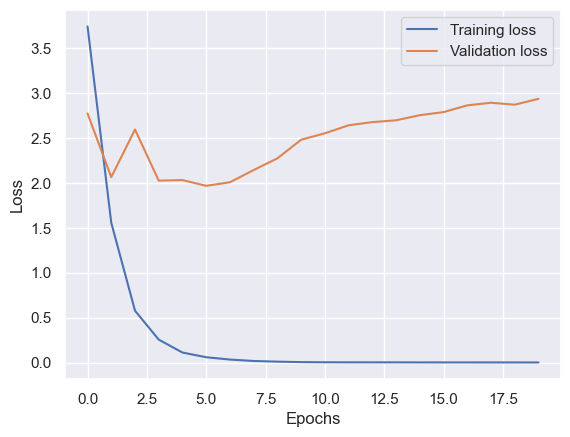

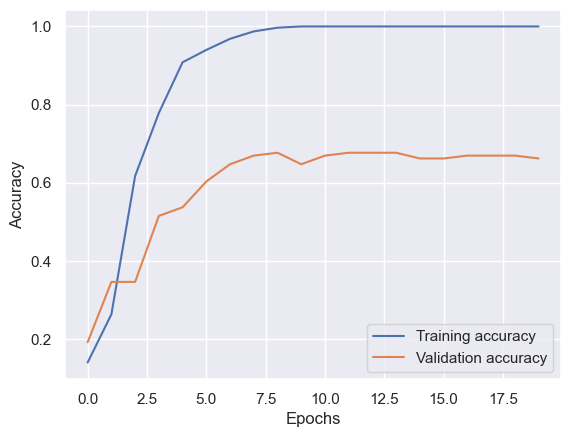

In [126]:
sub=0
# visualizing losses and accuracy
train_loss = hist.history['loss'][sub:]
val_loss = hist.history['val_loss'][sub:]
train_accu = hist.history['accuracy'][sub:]
val_accu = hist.history['val_accuracy'][sub:]
xc = range(len(val_loss))

fig1 = plt.figure()
fig1.patch.set_facecolor('white')
plt.plot(xc, train_loss, label='Training loss')
plt.plot(xc, val_loss, label='Validation loss')
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
fig1.show()

fig2 = plt.figure()
fig2.patch.set_facecolor('white')
plt.plot(xc, train_accu, label='Training accuracy')
plt.plot(xc, val_accu, label='Validation accuracy')
plt.legend(loc="lower right")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
fig2.show()